# Hypothesis Testing
**Reading: Emile-Geay 6.I-VI**

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
# These are some parameters to make figures nice (and big)

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Theory 

```{Important}
A **null hypothesis test** evaluates whether a particular observation is likely to have come about through pure chance.
```

In Earth Science, a cut-off is generally set at 5%. If we can say that the chance of the observation having come through chance is less than 5%, we would say that ***we rejected the null hypothesis***. This is also equivalent to saying that the observation is "statistically significant". In that case, we usually have an alternate hypothesis that we posit. 

A clasic example is climate change. We have observed a warming trend over the past century. Could such a warming trend have come about through the chance, i.e. weather? For example we could hypothesize that this trend was caused by a peculiar, but random, sequence of weather fluctuations - one that might reverse to the long-term mean. We would call this hypothesis **the null hypothesis**, and denote it by $H_0$.   We want to quantify that likelihood of that hypothesis being true. If we can quantiy that probability and say it is small - smaller than 5%, we can reject it. In turn this would give credence to the alternate hypothesis that the warming we have observed is due to human emissions. 

Hypothesis testing proceeds like this:
1. **Formulate a null hypothesis**: Come up with hypothesis that could potentially explain your result coming about through chance. I.e. it's weather! 
2. **Choose a significance level**: Choose the confidence with which you want to reject the null hypothesis. For example, if you choose a significance level of $95\%$ that means there is a $95\%$ probability that the null hypothesis is false. Conversely, there is a $p_{crit}=5\%$ probability that the null hypothesis is actually true. In other words, it means you are ok with a $5\%$ chance of a **false negative** result. 
3. **Test Statistic**: Define a metric for the test. This is called a test statistic, $T$. For the global warming example the metric or test statistic could be a warming trend.
4. **Null Distribution**: We then compute what the probability distribution of $T$ would be **if** the null hypothesis is true. We can denote this distribution by its cdf $F_{H_0}(T)$. 
5. **Evaluate Observations**: Evaluate the distribution of the null at the observed value of the test statistic: $F_{H_0}(T_{obs})$. By evaluating the CDF at $T_{obs}$ we can tell what is the probability that the null hypothesis would generate a value smaller than $T_{obs}$. 
6. **p-value** Flipping that around, one minus the cdf is *the probability of the null hypothesis could generate a value as big as or larger than the observed test statistic*:

    $$p=1-F_{H_0}(T_{obs})=P(H_0\text{ generating a value of } T \geq T_{obs})$$
    
Let's visualize all of this with some synthetic data meant to represent the global warming scenario.

# Student's t-Test 
A t-Test is used to test whether the mean of a sample is significantly different from a given value, or from the mean of another sample. A t-test is used when the variance of the measured quantity is *not* known, and has to be estimated from the data. 

Example: Earth's Energy Imbalance


Let's say we are interested whether greenhouse gases have caused a net change in Earth's Energy Imbalance, $X$, and say we have 23 years of measurements, where each year is independent. We find that averaging over the $n=23$ data points yields a value of $X_{obs}$. 

1. **Formulate the null** The first we have to do is formulate a null hypothesis. Formally, what we want to do is ask the question: could the observed value have been generated by noise (i.e. weather) and instrument error?  This is our null hypothesis. If we assume the distribution of weather is approximately normal (which works reasonably well if we're taking averages), we could write the following statistical model for $X$ to represent the null hypothesis:

$$ X_{H_0} \sim \mathcal{N}\left(\mu_0,\sigma\right)$$

2. **Choose a significance level**: Let's choose a **false negative** rate of $5\%$. This means that if a result is statistically significant, there is at most a $5\%$ chance that we have falsely rejected the null hypothesis. Conversely, this means there is at least a $95\%$ probability that the null hypothesis is false.ult. 

3. **Test Statistic** Now that we have formulated the null, we need to define a metric, or a test stastic, $T$. The definition of the test statistic often depends on our instrumentation and or available data. In this case, we have $n=23$ years of data, so we can take the sample mean. Unfortunately, we can't just formulate the test-statistic just in terms of the sample mean $T=\overline E$, since the distribution of the sample mean does depend on the variance, which is unknown. However, we can estimate the variance using, for example, the sample variance estimator. We want this sample variance to be part of the test statistic (rather than a paramater of the distribution). Let' say we want to evaluate whether the mean of the sample $\overline x$ is singificantly different from $\mu_0$. For the t-test, the test statistic is:

$$ T=\frac{\overline x_n - \mu_0}{s_n/\sqrt{n}}$$

4. **Null Distribution** The Null distribution is the distribution of the test statistic ***assuming $H_0$ is true***, i.e. assuming  $X$ is normally distributed with mean $\mu_0=0$. We can compute $T$ assuming $H_0$ is true, and plot it as both CDF and pdf. It turns out that if $X_{H_0}\sim\mathcal N$ than $T_{H_0}$ is distributed following a "Student's t-distribution". This is because the distribution was actually derived to describe precise this null hypothesis. You can look up the Student's t-distribution on [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution) or simulate it using [scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).  Here, we will simulate it starting from our model for $X_{H_0}$, taking the sample mean of $n$ samples, and dividing it by the sample variance.

In [68]:
sigma=1;
mu=0;
n=23;

# Probability Density of the Test Statistic for the null distriution 

#The null follows a student-t distribution with n degrees of freedom
H0_rv=stats.t(loc=mu,scale=sigma,df=n)

#pdf and cdf of H0
T_support=np.linspace(mu-3*sigma,mu+3*sigma,10000)
pdf_theory=H0_rv.pdf(T_support)
cdf_theory=H0_rv.cdf(T_support)

#Critical value (95th percentile of the distribution)
T_crit=H0_rv.ppf(0.95)


Text(0.6, 0.2, 'if $T>T_{crit}$ we reject $H_0$')

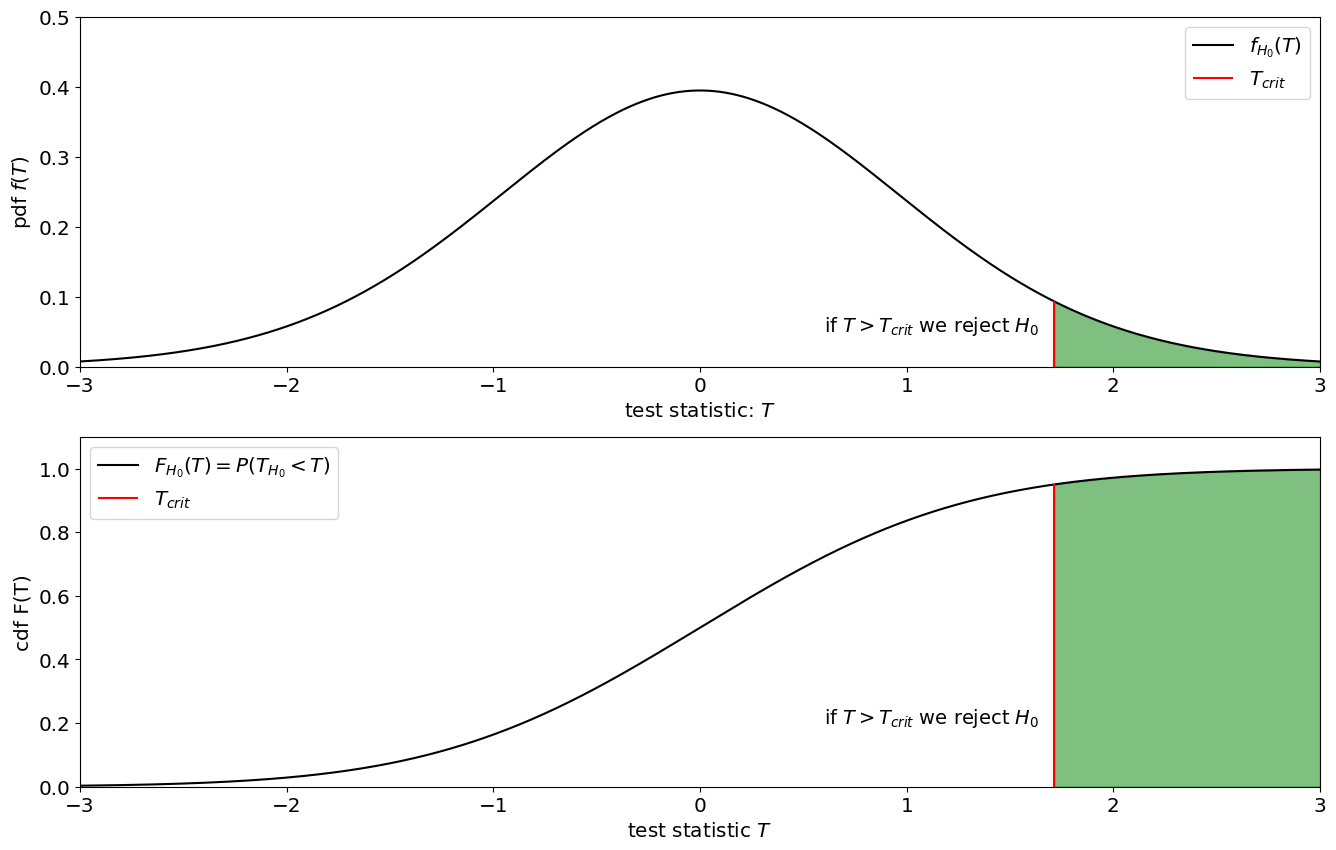

In [69]:
#### 
#Plots

#PDF
fig,ax=plt.subplots(2,1,figsize=[16,10])
plt.subplot(2,1,1)
plt.plot(T_support,pdf_theory,label=r'$f_{H_0}(T)$',color='k')

plt.xlabel(r'test statistic: $T$')
plt.ylabel(r'pdf $f(T)$')
plt.vlines(T_crit,0,H0_rv.pdf(T_crit),'r',label=r'$T_{crit}$')
plt.fill_between(
        x= T_support, 
        y1= pdf_theory, 
        where= (cdf_theory>=0.95),
        color= "g",
        alpha= 0.5)
plt.text(0.6,0.05,r'if $T>T_{crit}$ we reject $H_0$',fontsize=14)
plt.legend()
plt.xlim(-3,3)
plt.ylim(0,0.5)        

#CDF
plt.subplot(2,1,2)
plt.plot(T_support,cdf_theory,label='$F_{H_0}(T)=P(T_{H_0}<T)$',color='k')
plt.vlines(T_crit,0,0.95,color='r',label=r'$T_{crit}$')
plt.fill_between(
        x= T_support, 
        y1= cdf_theory, 
        where= (cdf_theory>=0.95),
        color= "g",
        alpha= 0.5)

plt.xlabel(r'test statistic $T$')
plt.ylabel(r'cdf F(T)')
plt.xlim(-3,3)        
plt.ylim(0,1.1)        
plt.legend()

plt.text(0.6,0.2,r'if $T>T_{crit}$ we reject $H_0$',fontsize=14)

4. **Evaluate Observations**: Evaluate the distribution of the null at the observed value of the test statistic: $F_{H_0}(T_{obs})$. By evaluating the CDF at $T_{obs}$ we can tell what is the probability that the null hypothesis would generate a value smaller than $T_{obs}$. Let's say we that over the 23 years we have observed a sample mean of $X=1$W/m$^2$, with a sample standard deviation of $0.1$. This would lead to a test statistic of:

   $$ T=\frac{\overline x_n - \mu_0}{s_n/\sqrt{n}}=\frac{1-0}{0.1/\sqrt{23}}$$

6. **p-value** Flipping that around, one minus the cdf is *the probability of the null hypothesis could generate a value as big as or larger than the observed test statistic*:

    $$p=1-F_{H_0}(T_{obs})=P(H_0\text{ generating a value of } T \geq T_{obs})$$
7. **Critical value**. Choose a critical value, for $p$. For example, if $p_{crit}=0.05\%$  and the value of the observation $p_{obs}$ is smaller than the $p_{crit}=5\%$  we would say that we reject the null hypothesis with 95% confidence., which means there is less than a 5% chance that the observed data was generated by the null. We can also plot the 
    

In [70]:
T_obs=1/0.1/np.sqrt(23)
pdf_obs=H0_rv.pdf(T_obs)
cdf_obs=H0_rv.cdf(T_obs)


(0.0, 1.2)

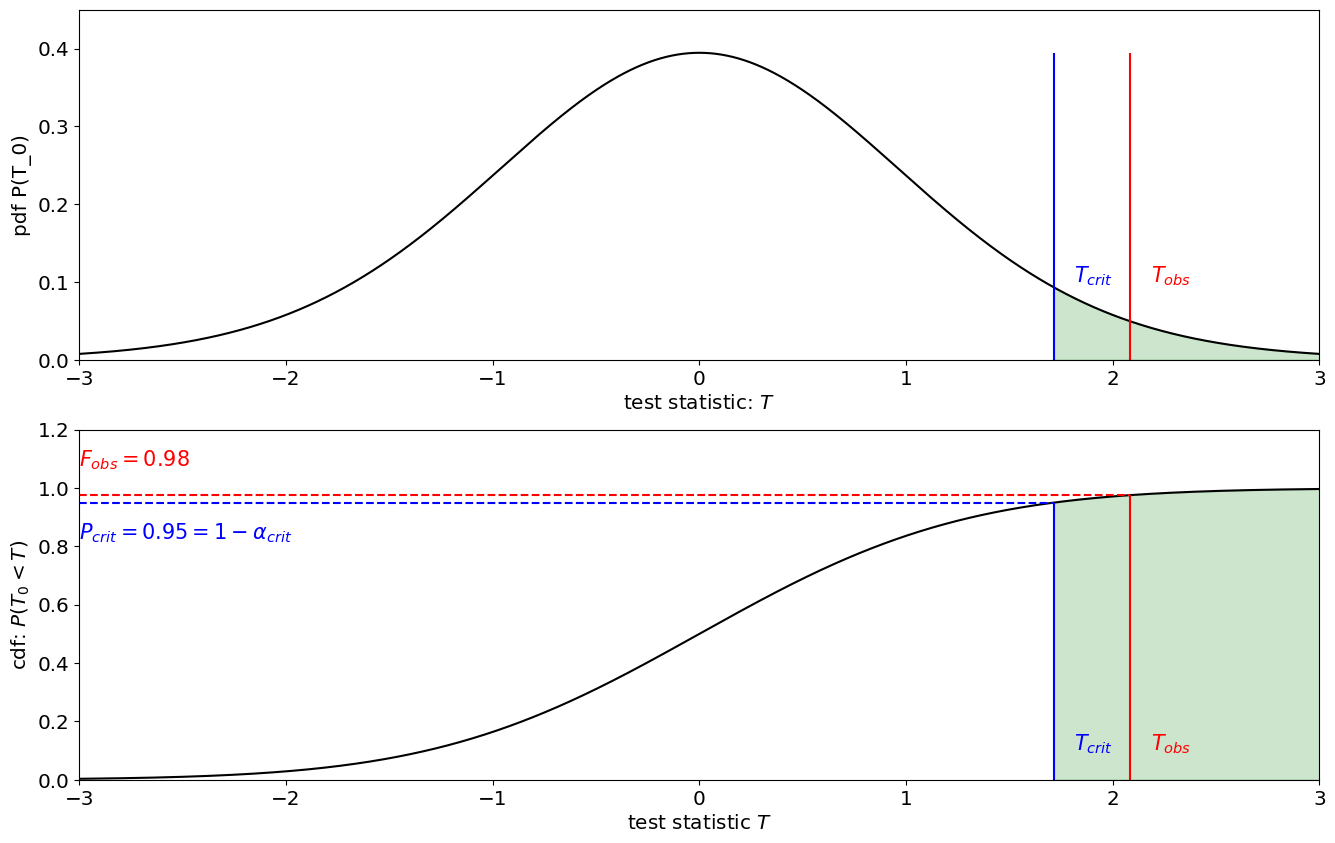

In [71]:

#### 
#Plots

#PDF
fig,ax=plt.subplots(2,1,figsize=[16,10])
plt.subplot(2,1,1)
plt.plot(T_support,pdf_theory,label=r'null $T_0$ from Student-t',color='k')
plt.vlines(T_obs,0,np.max(pdf_theory),'r')
plt.vlines(T_crit,0,np.max(pdf_theory),'b')
plt.fill_between(
        x= T_support, 
        y1= pdf_theory, 
        where= (T_support>T_crit),
        color= "g",
        alpha= 0.2)

plt.text(T_obs+0.1,0.1,'$T_{obs}$',color='r',fontsize=15)
plt.text(T_crit+0.1,0.1,'$T_{crit}$',color='b',fontsize=15)

plt.xlabel(r'test statistic: $T$')
plt.ylabel('pdf P(T_0)')
plt.xlim(-3,3)
plt.ylim(0,0.45)



#CDF
plt.subplot(2,1,2)
plt.plot(T_support,cdf_theory,label='null $T_0$ from student-t',color='k')

plt.vlines(T_obs,0,cdf_obs,color='r',)
plt.hlines(cdf_obs,-3,T_obs,color='r',linestyle='--')
plt.vlines(T_crit,0,0.95,'b')
plt.hlines(0.95,-3,T_crit,color='b',linestyle='--')

plt.fill_between(
        x= T_support, 
        y1= cdf_theory, 
        where= (cdf_theory>0.95),
        color= "g",
        alpha= 0.2)

plt.text(T_obs+0.1,0.1,'$T_{obs}$',color='r',fontsize=15)
plt.text(mu-3*sigma,cdf_obs+0.1,'$F_{obs}=$'+str(round(cdf_obs,2)),color='r',fontsize=15)
plt.text(T_crit+0.1,0.1,'$T_{crit}$',color='b',fontsize=15)
plt.text(mu-3*sigma,cdf_obs-0.15,r'$P_{crit}=0.95=1-\alpha_{crit}$',color='b',fontsize=15)


plt.xlabel(r'test statistic $T$')
plt.ylabel(r'cdf: $P(T_0<T)$')
plt.xlim(-3,3)
plt.ylim(0,1.2)

# Numerical Simulation of Null Hypothesis

Often times, there is no known theoretical distribution for the null hypothesis. In that case, we can evaluate the null hypothesis using a Monte Carlo method, i.e. drawing numerical realizations of H0. We can then determining the value of the critical level of the test statistic, as the 95h percentile of the sample distribuiton. We can also determine the $\alpha$ of the observations by looking where it fits in the sample distribution i.e. the place beyond whicih only 5% of the distribution lie. 

In [66]:
####Numerical:
m=1000000;
T=np.zeros(m);

# Draw samples of H0
X_H0=stats.norm.rvs(loc=mu,scale=sigma,size=[n,m])

#compute the test statistic 
xn=np.mean(X_H0,axis=0)
sn=np.std(X_H0,axis=0)
T_H0=(xn-mu)/(sn/np.sqrt(n))

#compute the critical test statistic
T_crit=np.percentile(X_H0,95)

# compoute the alpha_obs
alpha_obs=1-stats.percentileofscore(T_H0,T_obs)/100


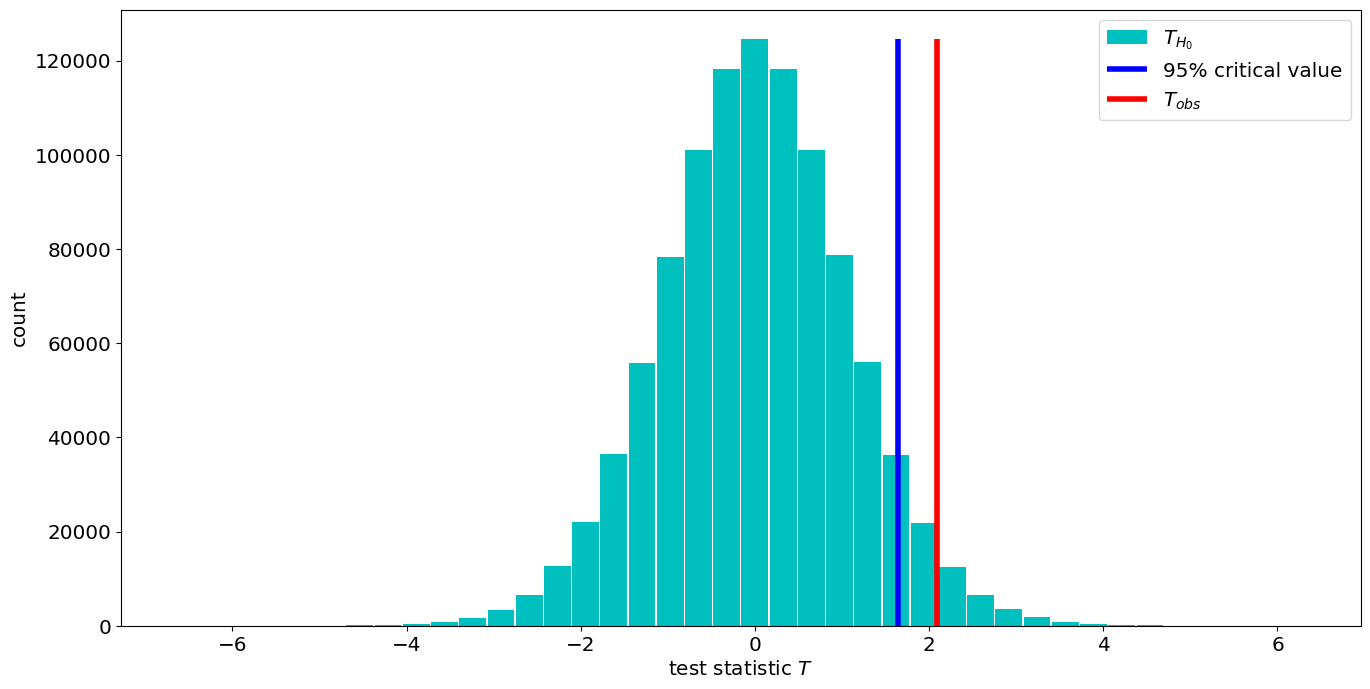

In [62]:
#### 
#Plots

# plot histogram of the null distribution
hist=plt.hist(T_H0,40,rwidth=0.95,label='$T_{H_0}$',color='c');

# plot critical value
plt.vlines(T_crit,0,np.max(hist[0]),'b',label='95% critical value',linewidth=4)

# plot value of the observed test statistic
plt.vlines(T_obs,0,np.max(hist[0]),'r',label='$T_{obs}$',linewidth=4)


plt.xlabel(r'test statistic $T$')
plt.ylabel('count')
plt.legend()


In [64]:
alpha_obs

0.02682899999999988